In [1]:
from tensorflow.keras.layers import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
base_path = r'C:\Users\gopal\Downloads\final_year_project\IAM_Words'
words_list = []

words = open(f"{base_path}\\words.txt", "r").readlines()
for line in words:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err":  # We don't need to deal with errored entries.
        words_list.append(line)

len(words_list)

np.random.shuffle(words_list)




In [3]:
split_idx = int(0.9 * len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 86810
Total validation samples: 4823
Total test samples: 4823


In [4]:
base_image_path = os.path.join(base_path, "words")


def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
            base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)
train_img_paths = train_img_paths + ['C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\a.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\about.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Aciclover.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Acrivastine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Adalimumab.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Alendronic_acid.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\all.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Allopurinol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Alogliptin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\also.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Amlodipine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Amoxicillin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Anastrozole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\and.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\as.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\at.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Atenolol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Atorvastatin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Azathioprine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Azithromycin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\be.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\because.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Bendroflumethiazide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Benzoyal_Peroxide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Betahistine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Betamethasone_tablets.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Bimatoprost.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Bisacodyl.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Bisoprolol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\blog.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Brinzolamide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Bumetanide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Buscopan.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\but.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\by.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Calcipotriol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\came.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\can.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Candesartan.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Carbamazepine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Carbimazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Carbocisteine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Carvedilol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Cefalexin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Champix.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Chloramphenicol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Chlorhexidine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ciprofloxacin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Citalopram.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Clarithromycin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Clobetasol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Clobetasone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Clonazepam.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Clonidine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Clopidogrel.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Codeine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Colecalciferol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\could.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Cyanocobalamin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Cyclizine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Dabigatran.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Dapagliflozin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\day.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Diazepam.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Diclofenac.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Digoxin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Dihydrocodeine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Diltiazem.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Diphenhydramine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Dipyridamole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\do.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Docusate.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Domperidone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Donepezil.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Dosulepin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Doxazosin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Doxycycline.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Duloxetine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Edoxaban.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Empagliflozin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Enalapril.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\english.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Eplerenone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Erythromycin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Escitalopram.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Esomeprazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\even.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ezetimibe.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Felodipine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Fentanyl.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ferrous fumarate.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ferrous sulfate.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Finasteride.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\find.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\first.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Flucloxacillin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Fluconazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Fluoxetine .jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Fluticasone .jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Folic acid.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\for.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\from.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Furosemide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Fusidic acid.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Fybogel .jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Gabapentin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Gaviscon.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\get.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\give.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Gliclazide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Glimepiride.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Glyceryl .jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\go.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Haloperidol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\have.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\he.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Heparinoid.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\her.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\here.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\him.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\his.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\how.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Hydrocortisone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Hydroxocobalamin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Hydroxychloroquine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\i.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ibuprofen and codeine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\if.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\in.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Indapamide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Insulin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\into.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Irbesartan.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Isotretinoin gel .jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\it.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\its.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\just.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ketoconazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\know.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Labetalol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Lactulose.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Lamotrigine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Lansoprazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Latanoprost.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Lercanidipine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Letrozole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Levetiracetam.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Levothyroxine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\like.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Linagliptin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Lisinopril.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Lithium.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\look.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Loperamide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Loratadine .jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Lorazepam.jpg','C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Losartan.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Low-dose aspirin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Lymecycline.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Macrogol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\make.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\man.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\many.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\me.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Mebendazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Mebeverine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Melatonin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Memantine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Mesalazine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Metformin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Methadone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Methotrexate.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Metoclopramide.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Metoprolol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Metronidazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Mirabegron.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Mirtazapine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Molnupiravir.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Montelukast.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\more.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Morphine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\most.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\my.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Naproxen.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Nefopam.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\new.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Nicorandil.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Nifedipine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Nitrofurantoin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\no.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Nortriptyline.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\not.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\now.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Nystatin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\of.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Olanzapine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Olmesartan.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Omeprazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\on.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\one.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\only.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\or.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\other.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\our.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\out.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Oxybutynin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Oxycodone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Pantoprazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Paroxetine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Paxlovid.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\people.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Peppermint oil.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Perindopril.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Phenytoin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Pioglitazone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Pravastatin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Pregabalin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Prochlorperazine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Propranolol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Quetiapine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Rabeprazole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ramipril.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ranitidine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Remdesivir .jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Risedronate.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Risperidone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Rivaroxaban.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ropinirole.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Rosuvastatin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Saxagliptin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\say.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\see.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Senna.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Sertraline.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\she.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Sildenafil.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Simeticone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Simvastatin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Sitagliptin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\so.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Solifenacin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\some.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Sotalol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Sotrovimab.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Spironolactone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Sulfasalazine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Sumatriptan.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Tadalafil.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\take.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Tamsulosin.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\tell.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Temazepam.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Terbinafine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\than.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\that.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\the.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\their.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\them.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\then.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\there.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\these.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\they.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Thiamine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\thing.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\think.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\this.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\those.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Tibolone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Ticagrelor.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\time.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Timolol tablets.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\to.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Tolterodine.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Topiramate.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Tramadol.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Tranexamic acid.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Trazodone.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\Trimethoprim.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\two.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\up.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\use.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\used.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\very.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\want.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\we.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\well.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\what.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\when.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\which.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\will.jpg', 'C:\\Users\\gopal\\Downloads\\BulkResizePhotos\\with.jpg']

In [5]:
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

characters = sorted(list(characters))

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.
train_labels_cleaned = train_labels_cleaned + ['a', 'about', 'Aciclover', 'Acrivastine', 'Adalimumab', 'Alendronic_acid', 'all', 'Allopurinol', 'Alogliptin', 'also', 'Amlodipine', 'Amoxicillin', 'Anastrozole', 'and', 'as', 'at', 'Atenolol', 'Atorvastatin', 'Azathioprine', 'Azithromycin', 'be', 'because', 'Bendroflumethiazide', 'Benzoyal_Peroxide', 'Betahistine', 'Betamethasone_tablets', 'Bimatoprost', 'Bisacodyl', 'Bisoprolol', 'blog', 'Brinzolamide', 'Bumetanide', 'Buscopan', 'but', 'by', 'Calcipotriol', 'came', 'can', 'Candesartan', 'Carbamazepine', 'Carbimazole', 'Carbocisteine', 'Carvedilol', 'Cefalexin', 'Champix', 'Chloramphenicol', 'Chlorhexidine', 'Ciprofloxacin', 'Citalopram', 'Clarithromycin', 'Clobetasol', 'Clobetasone', 'Clonazepam', 'Clonidine', 'Clopidogrel', 'Codeine', 'Colecalciferol', 'could', 'Cyanocobalamin', 'Cyclizine', 'Dabigatran', 'Dapagliflozin', 'day', 'Diazepam', 'Diclofenac', 'Digoxin', 'Dihydrocodeine', 'Diltiazem', 'Diphenhydramine', 'Dipyridamole', 'do', 'Docusate', 'Domperidone', 'Donepezil', 'Dosulepin', 'Doxazosin', 'Doxycycline', 'Duloxetine', 'Edoxaban', 'Empagliflozin', 'Enalapril', 'english', 'Eplerenone', 'Erythromycin', 'Escitalopram', 'Esomeprazole', 'even', 'Ezetimibe', 'Felodipine', 'Fentanyl', 'Ferrous fumarate', 'Ferrous sulfate', 'Finasteride', 'find', 'first', 'Flucloxacillin', 'Fluconazole', 'Fluoxetine ', 'Fluticasone ', 'Folic acid', 'for', 'from', 'Furosemide', 'Fusidic acid', 'Fybogel ', 'Gabapentin', 'Gaviscon', 'get', 'give', 'Gliclazide', 'Glimepiride', 'Glyceryl ', 'go', 'Haloperidol', 'have', 'he', 'Heparinoid', 'her', 'here', 'him', 'his', 'how', 'Hydrocortisone', 'Hydroxocobalamin', 'Hydroxychloroquine', 'i', 'Ibuprofen and codeine', 'if', 'in', 'Indapamide', 'Insulin', 'into', 'Irbesartan', 'Isotretinoin gel ', 'it', 'its', 'just', 'Ketoconazole', 'know', 'Labetalol', 'Lactulose', 'Lamotrigine', 'Lansoprazole', 'Latanoprost', 'Lercanidipine', 'Letrozole', 'Levetiracetam', 'Levothyroxine', 'like', 'Linagliptin', 'Lisinopril', 'Lithium', 'look', 'Loperamide', 'Loratadine ', 'Lorazepam', 'Losartan', 'Low-dose aspirin', 'Lymecycline', 'Macrogol', 'make', 'man', 'many', 'me', 'Mebendazole', 'Mebeverine', 'Melatonin', 'Memantine', 'Mesalazine', 'Metformin', 'Methadone', 'Methotrexate', 'Metoclopramide', 'Metoprolol', 'Metronidazole', 'Mirabegron', 'Mirtazapine', 'Molnupiravir', 'Montelukast', 'more', 'Morphine', 'most', 'my', 'Naproxen', 'Nefopam', 'new', 'Nicorandil', 'Nifedipine', 'Nitrofurantoin', 'no', 'Nortriptyline', 'not', 'now', 'Nystatin', 'of', 'Olanzapine', 'Olmesartan', 'Omeprazole', 'on', 'one', 'only', 'or', 'other', 'our', 'out', 'Oxybutynin', 'Oxycodone', 'Pantoprazole', 'Paroxetine', 'Paxlovid', 'people', 'Peppermint oil', 'Perindopril', 'Phenytoin', 'Pioglitazone', 'Pravastatin', 'Pregabalin', 'Prochlorperazine', 'Propranolol', 'Quetiapine', 'Rabeprazole', 'Ramipril', 'Ranitidine', 'Remdesivir ', 'Risedronate', 'Risperidone', 'Rivaroxaban', 'Ropinirole', 'Rosuvastatin', 'Saxagliptin', 'say', 'see', 'Senna', 'Sertraline', 'she', 'Sildenafil', 'Simeticone', 'Simvastatin', 'Sitagliptin', 'so', 'Solifenacin', 'some', 'Sotalol', 'Sotrovimab', 'Spironolactone', 'Sulfasalazine', 'Sumatriptan', 'Tadalafil', 'take', 'Tamsulosin', 'tell', 'Temazepam', 'Terbinafine', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'Thiamine', 'thing', 'think', 'this', 'those', 'Tibolone', 'Ticagrelor', 'time', 'Timolol tablets', 'to', 'Tolterodine', 'Topiramate', 'Tramadol', 'Tranexamic acid', 'Trazodone', 'Trimethoprim', 'two', 'up', 'use', 'used', 'very', 'want', 'we', 'well', 'what', 'when', 'which', 'will', 'with']

Maximum length:  21
Vocab size:  78


In [6]:
def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [8]:
def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image

In [9]:
batch_size = 64
padding_token = 99
image_width = 300
image_height = 100


def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

In [10]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)

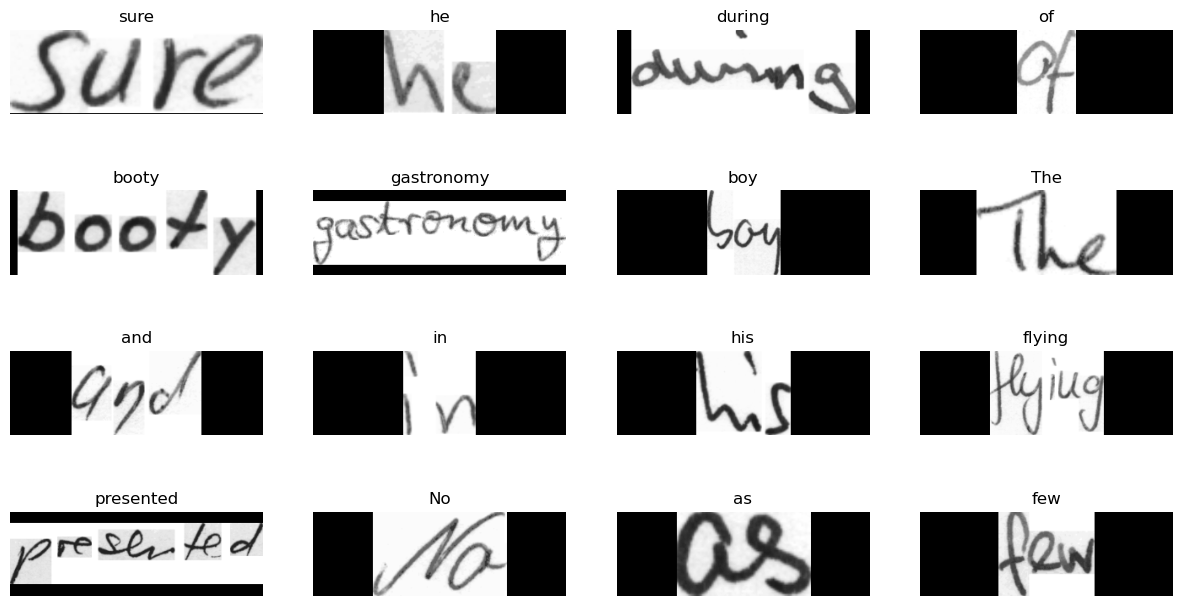

In [11]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")


plt.show()

In [12]:
class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred


def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv block.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()



Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 300, 100, 1)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 300, 100, 32)         320       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 150, 50, 32)          0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 150, 50, 64)          18496     ['pool1[0][0]']               
                                                                           

In [13]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

In [14]:
# def predict_text_in_image(model, image_path):
#     preprocessed_image = preprocess_image(image_path)
#     preprocessed_image = tf.expand_dims(preprocessed_image, axis=0)  # Add batch dimension

#     predictions = model.predict(preprocessed_image)
#     results = keras.backend.ctc_decode(
#         predictions, input_length=np.ones(predictions.shape[0]) * predictions.shape[1], greedy=True
#     )[0][0][:, :max_len]

#     # Convert the sparse tensor to a string
# #     predicted_text = "".join([str(num_to_char(int(idx))) for idx in predictions_decoded.numpy()[0]])
#     output_text = []
#     for res in results:
#         res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
#         res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
#         output_text.append(res)
#     return output_text


# image_path_to_predict = r'C:\Users\gopal\OneDrive\Pictures\test1.jpg'
# predicted_text = predict_text_in_image(prediction_model, image_path_to_predict)
# print("Predicted Text:", *predicted_text)
def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )

In [ ]:
epochs = 50 # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)

Epoch 1/50
1/1 [==============================] - 2s 2s/step
Mean edit distance for epoch 1: 20.7602
1361/1361 [==============================] - 894s 651ms/step - loss: 14.7876 - val_loss: 16.3694
Epoch 2/50
1/1 [==============================] - 0s 84ms/step
Mean edit distance for epoch 2: 20.3274
1361/1361 [==============================] - 1020s 749ms/step - loss: 11.5898 - val_loss: 13.1872


Epoch 3/50
1/1 [==============================] - 0s 212ms/step
Mean edit distance for epoch 3: 20.1689
1361/1361 [==============================] - 991s 728ms/step - loss: 9.9629 - val_loss: 14.3724
Epoch 4/50
1/1 [==============================] - 0s 93ms/step
Mean edit distance for epoch 4: 20.1872
1361/1361 [==============================] - 982s 721ms/step - loss: 8.4829 - val_loss: 14.9181


Epoch 5/50
1/1 [==============================] - 0s 85ms/step
Mean edit distance for epoch 5: 19.2858
1361/1361 [==============================] - 1001s 736ms/step - loss: 6.6806 - val_loss: 12.3416
Epoch 6/50
1/1 [==============================] - 0s 197ms/step
Mean edit distance for epoch 6: 19.1105
1361/1361 [==============================] - 1006s 739ms/step - loss: 5.1952 - val_loss: 11.3958


Epoch 7/50
1/1 [==============================] - 0s 112ms/step
Mean edit distance for epoch 7: 18.3691
1361/1361 [==============================] - 1015s 746ms/step - loss: 4.2394 - val_loss: 6.9611
Epoch 8/50
2/2 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 115ms/step
Mean edit distance for epoch 8: 17.9263
1361/1361 [==============================] - 1413s 1s/step - loss: 3.6342 - val_loss: 4.3384
Epoch 9/50
1/1 [==============================] - 0s 191ms/step
Mean edit distance for epoch 9: 17.7956
1361/1361 [==============================] - 1287s 946ms/step - loss: 3.2521 - val_loss: 3.6303
Epoch 10/50
2/2 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 86ms/step
Mean edit distance for epoch 10: 17.5988
1361/1361 [==============================] - 992s 729ms/step - loss: 2.9621 - val_loss: 2.7758
Epoch 11/50
1/1 [==============================] - 0s 195ms/step
Mean edit distance for epoch 11: 17.5775
1361/1361 [==============================] - 977s 718ms/step - loss: 2.7509 - val_loss: 2.8369
Epoch 12/50
2/2 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 125ms/step
Mean edit distance for epoch 12: 17.6231
1361/1361 [==============================] - 996s 732ms/step - loss: 2.5821 - val_loss: 3.1288
Epoch 13/50
1/1 [==============================] - 0s 105ms/step
Mean edit distance for epoch 13: 17.4777
1361/1361 [==============================] - 981s 721ms/step - loss: 2.4683 - val_loss: 2.3189
Epoch 14/50
2/2 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 79ms/step
Mean edit distance for epoch 14: 17.4709
1361/1361 [==============================] - 984s 723ms/step - loss: 2.3504 - val_loss: 2.3326
Epoch 15/50
1/1 [==============================] - 0s 83ms/step
Mean edit distance for epoch 15: 17.4196
1361/1361 [==============================] - 974s 716ms/step - loss: 2.2489 - val_loss: 2.2070
Epoch 16/50
2/2 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 200ms/step
Mean edit distance for epoch 16: 17.4158
1361/1361 [==============================] - 1235s 908ms/step - loss: 2.1631 - val_loss: 1.9857
Epoch 17/50
1/1 [==============================] - 0s 116ms/step
Mean edit distance for epoch 17: 17.3906
1361/1361 [==============================] - 1278s 939ms/step - loss: 2.0776 - val_loss: 1.9567
Epoch 18/50
2/2 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 90ms/step
Mean edit distance for epoch 18: 17.3840
1361/1361 [==============================] - 1145s 841ms/step - loss: 2.0269 - val_loss: 2.0597
Epoch 19/50
1/1 [==============================] - 0s 108ms/step
Mean edit distance for epoch 19: 17.3338
1361/1361 [==============================] - 1089s 801ms/step - loss: 1.9825 - val_loss: 1.8194
Epoch 20/50
2/2 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 188ms/step
Mean edit distance for epoch 20: 17.3519
1361/1361 [==============================] - 1026s 754ms/step - loss: 1.9309 - val_loss: 1.9473
Epoch 21/50
1/1 [==============================] - 0s 218ms/step
Mean edit distance for epoch 21: 17.3761
1361/1361 [==============================] - 1955s 1s/step - loss: 1.8865 - val_loss: 1.9193
Epoch 22/50
 928/1361 [===================>..........] - ETA: 5:08 - loss: 1.8155

In [ ]:
def predict_text_in_image(model, image_path):
    preprocessed_image = preprocess_image(image_path)
    preprocessed_image = tf.expand_dims(preprocessed_image, axis=0)  # Add batch dimension

    predictions = model.predict(preprocessed_image)
    results = keras.backend.ctc_decode(
        predictions, input_length=np.ones(predictions.shape[0]) * predictions.shape[1], greedy=True
    )[0][0][:, :max_len]

    # Convert the sparse tensor to a string
#     predicted_text = "".join([str(num_to_char(int(idx))) for idx in predictions_decoded.numpy()[0]])
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

image_path_to_predict = r'C:\Users\gopal\Downloads\Simvastatin.jpg'
predicted_text = predict_text_in_image(prediction_model, image_path_to_predict)
print("Predicted Text:", *predicted_text)

In [ ]:
model.save('hand_written.keras')